## The New York Times Covid-19 Database

The New York Times Covid-19 Database is 
a county-level database of confirmed cases and deaths, 
compiled from state and local governments and health departments across the United States.
The initial release of the database was on Thursday, March 26, 2020, and it is updated daily. 

These data have fueled many articles and graphics by The Times; these are updated regularly at
[https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html). 
The Times has created many visualizations that are effective communications of important information about the pandemic. 

The data are publically available via GitHub: [https://github.com/nytimes/covid-19-data](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html).  In this illustration we will only use
the data aggregated at the state level. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from datascience import *

covid_table = Table.read_table("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
covid_table = covid_table.drop('fips')
covid_table

date,state,cases,deaths
2020-01-21,Washington,1,0
2020-01-22,Washington,1,0
2020-01-23,Washington,1,0
2020-01-24,Illinois,1,0
2020-01-24,Washington,1,0
2020-01-25,California,1,0
2020-01-25,Illinois,1,0
2020-01-25,Washington,1,0
2020-01-26,Arizona,1,0
2020-01-26,California,2,0


### Process the recent data

Here is a function that creates a Table with the recent Covid-19 statistics for a given state. Just pass in the name of the state as a string.


In [7]:
def process_recent_state_data(state):
    first_date = '2021-01-11'
    next_date = '2021-01-12'
    recent_data = covid_table.where('date', are.above(first_date))
    recent_state_data = recent_data.where('state', state)
    new_cases = np.diff(recent_state_data['cases'])
    recent_state_data = recent_state_data.where('date', are.above(next_date))
    recent_state_data = recent_state_data.with_column('new cases', new_cases)
    recent_state_data = recent_state_data.with_column('days back', np.arange(-1*len(recent_state_data['date']), 0))
    return recent_state_data


date,state,cases,deaths,new cases,days back
2021-01-13,Illinois,1048784,19619,5743,-31
2021-01-14,Illinois,1055550,19728,6766,-30
2021-01-15,Illinois,1062121,19876,6571,-29
2021-01-16,Illinois,1067230,20021,5109,-28
2021-01-17,Illinois,1071307,20052,4077,-27
2021-01-18,Illinois,1074719,20119,3412,-26
2021-01-19,Illinois,1079307,20154,4588,-25
2021-01-20,Illinois,1084134,20285,4827,-24
2021-01-21,Illinois,1089010,20423,4876,-23
2021-01-22,Illinois,1095917,20535,6907,-22


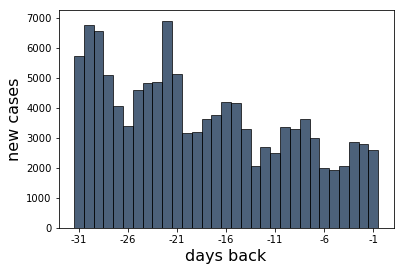

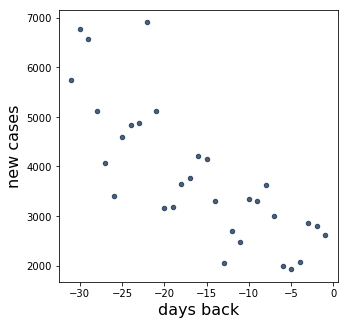

In [8]:
state_data = process_recent_state_data('Illinois')
state_data.show(10)
state_data.bar('days back', 'new cases')
state_data.scatter('days back', 'new cases')


In [43]:
table = covid_table.drop('state')
table = table.group('date', sum)
table

date,cases sum,deaths sum
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,3,0
2020-01-26,5,0
2020-01-27,5,0
2020-01-28,5,0
2020-01-29,5,0
2020-01-30,6,0


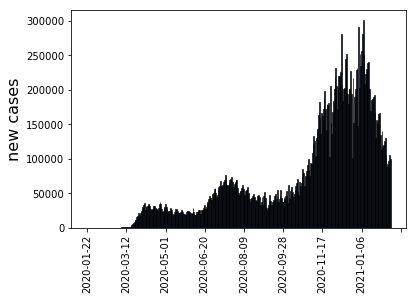

In [44]:
new_cases = np.diff(table['cases sum'])
us_cases_by_day = Table().with_columns('date', table['date'][1:], 'new cases', new_cases)
us_cases_by_day.bar('date', 'new cases')
plt.xlabel('')
_ = plt.xticks(rotation=90)

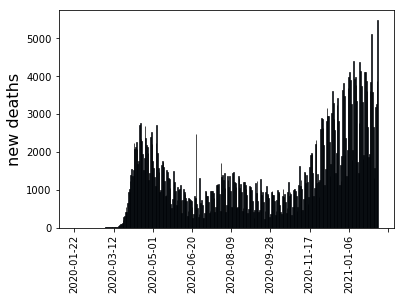

In [42]:
new_deaths = np.diff(table['deaths sum'])
us_deaths_by_day = Table().with_columns('date', table['date'][1:], 'new deaths', new_deaths)
us_deaths_by_day.bar('date', 'new deaths')
plt.xlabel('')
_ = plt.xticks(rotation=90)